### Homework 6

#### ELEC-E8740 - Basics of sensor fusion Autumn'21
#### Problem description:

Consider the scalar differential equation

\begin{equation}
\dot{x} = fx \\
x(0) = x_0
\end{equation}
with $f = -1/2$ and $x_0 = 3$

### (a) Solve the equation analytically

The equation can be expressed as:

\begin{equation}
\frac{dx}{dt} = -\frac{1}{2}x \\
\frac{1}{x}dx = -\frac{1}{2}dt
\end{equation}

Take integral for both sides
\begin{equation}
\int \frac{1}{x}\, dx = \int -\frac{1}{2}\,dt
\end{equation}

Solving both integral gives:

\begin{equation}
\ln|x| + C_1 = -\frac{1}{2}t + C_2 \\
let \quad C = C_2 - C_1
\end{equation}

Solving for x:

\begin{equation}
x = \pm e^{-\frac{1}{2}t + C} \\
\rightarrow \quad x = \pm e^Ce^{-\frac{1}{2}t}
\end{equation}

Use the initial condition $x_0 = 3$ to solve for C:
\begin{equation}
e^Ce^{-\frac{1}{2}*0} = 3
\rightarrow \quad C = 3
\end{equation}

Analytical solution for x is:
\begin{equation}
x = 3e^{-\frac{1}{2}t}
\end{equation}

In [22]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

t = np.linspace(0,10,100)
x0 = 3
C = 3
f = -1/2

x = C*np.exp(-1/2*t)

### (b) Solve the equation by Euler's method:
Apply Euler's method to this problem, we have:

\begin{equation}
x(t +\Delta t) = x(t) + (-\frac{1}{2}x)\Delta t
\end{equation}

In [23]:
x0 = 3
x_Euler = np.zeros((t.shape[0]))
x_Euler[0] = x0

for i in range(1,t.shape[0]):
    x1 = x0 + f*x0*(t[i]-t[i-1])
    x0 = x1
    x_Euler[i] = x1

### (c) Solve the equation by using builtin solver:
- Use Python's odeint

In [24]:
def func(x,t):
    return f*x
x0 = 3
x_ODE = integrate.odeint(func,x0,t)

### (d) Visualize the 3 solutions

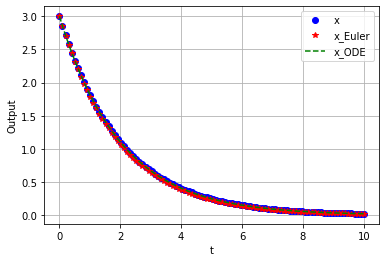

In [25]:
plt.clf()
plt.plot(t,x,'bo', label='x')
plt.plot(t,x_Euler,'r*', label='x_Euler')
plt.plot(t,x_ODE,'g--', label='x_ODE')
plt.xlabel('t')
plt.ylabel('Output')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()